<a href="https://colab.research.google.com/github/rajguru9889/ML_LAB/blob/main/week_5_gradient_discaant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Apply Gradient descent for linear regression on a house price prediction dataset with different learning rates and iterations(epochs)

Saving Housing.csv to Housing (6).csv


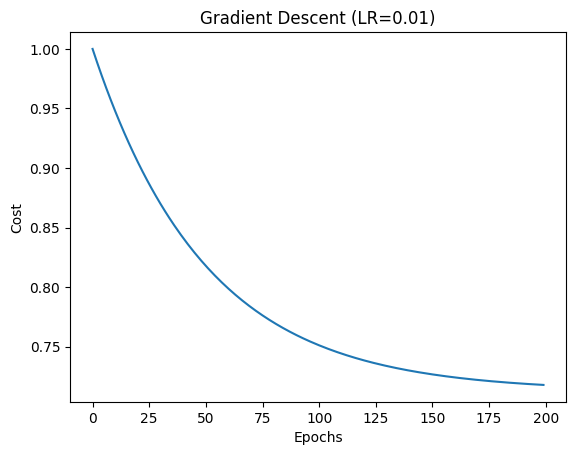

Slope: 0.4642, Intercept: 0.0000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload
uploaded = files.upload()

# Load dataset
df = pd.read_csv("Housing.csv")

# Pick feature (X) and target (y)
X = df['area'].values
y = df['price'].values

# Normalize for stability
X = (X - X.mean()) / X.std()
y = (y - y.mean()) / y.std()

# Gradient Descent
m, c = 0, 0
lr = 0.01   # learning rate
epochs = 200
costs = []

for _ in range(epochs):
    y_pred = m*X + c
    error = y_pred - y
    m -= lr * np.mean(error * X)
    c -= lr * np.mean(error)
    costs.append(np.mean(error**2))

# Plot cost vs epochs
plt.plot(costs)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Gradient Descent (LR=0.01)")
plt.show()

print(f"Slope: {m:.4f}, Intercept: {c:.4f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Generate nonlinear data
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1,1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Polynomial transformation (degree 10 = overfitting)
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# --- Linear Regression (overfits) ---
lin_reg = LinearRegression().fit(X_train_poly, y_train)
y_pred_lin = lin_reg.predict(X_test_poly)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# --- Ridge Regression ---
ridge = Ridge(alpha=1.0).fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# --- Lasso Regression ---
lasso = Lasso(alpha=0.01, max_iter=10000).fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# # Print results
# print("Linear Regression Coefficients:", lin_reg.coef_)
# print("Ridge Coefficients:", ridge.coef_)
# print("Lasso Coefficients:", lasso.coef_)

print("\nMSE (Linear Regression):", mse_lin)
print("MSE (Ridge):", mse_ridge)
print("MSE (Lasso):", mse_lasso)




MSE (Linear Regression): 0.030607661997326598
MSE (Ridge): 0.028576776044776483
MSE (Lasso): 0.056673357979383526


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.50116e-21): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.312e+00, tolerance: 3.214e-03
  model = cd_fast.enet_coordinate_descent(
